In [ ]:
self.weight_decay_lambda = 0.001  # 인스턴스 변수 추가

def loss(self, x):
    y = self.predict(x)
    weight_decay = 0
    for idx in range(1, 4):
        W = self.params['W' + str(idx)]
        weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
    
    return self.lastlayer.forward(y, t) + weight_decay

### <b>■ 가중치 감소 (p.217)</b>

### ※ 문제93. 어제 마지막 문제로 만들었던 신경망에서 배치 정규화를 빼고 층을 7층으로 만들어서 구현하시오

In [ ]:
network = MultiLayerNet(input_size = 784, hidden_size_list=[100,100,100,100,100,100], output_size = 10)
optimizer = SGD(lr=0.01)

train acc, test acc | 0.12675, 0.1257
train acc, test acc | 0.9414166666666667, 0.9403
train acc, test acc | 0.9577666666666667, 0.9494
train acc, test acc | 0.9652166666666666, 0.9587
train acc, test acc | 0.9718666666666667, 0.9608
train acc, test acc | 0.9733333333333334, 0.9628
train acc, test acc | 0.9768, 0.966
train acc, test acc | 0.9837333333333333, 0.972
train acc, test acc | 0.9774166666666667, 0.9642
train acc, test acc | 0.9858833333333333, 0.9745
train acc, test acc | 0.9697666666666667, 0.957
train acc, test acc | 0.98565, 0.9703
train acc, test acc | 0.99055, 0.9737
train acc, test acc | 0.9894666666666667, 0.9741
train acc, test acc | 0.9913333333333333, 0.9751
train acc, test acc | 0.9850333333333333, 0.9672
train acc, test acc | 0.9905333333333334, 0.9733


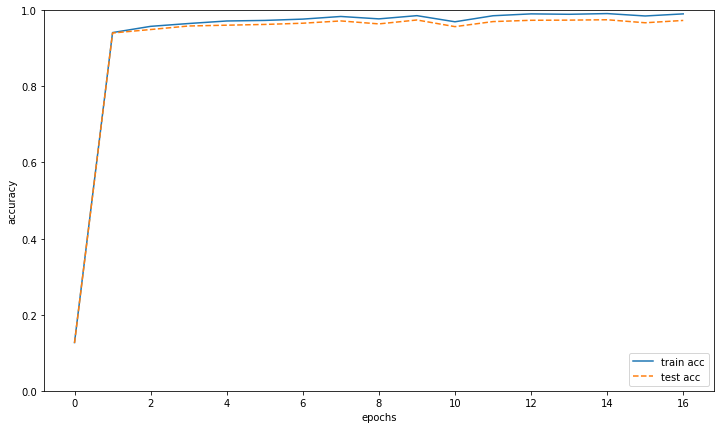

In [1]:
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

from common.optimizer import *


class multiLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = np.random.randn(input_size, hidden_size) / np.sqrt(input_size) * np.sqrt(2)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = np.random.randn(hidden_size, hidden_size) / np.sqrt(hidden_size) * np.sqrt(2)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = np.random.randn(hidden_size, hidden_size) / np.sqrt(hidden_size) * np.sqrt(2)
        self.params['b3'] = np.zeros(hidden_size)
        self.params['W4'] = np.random.randn(hidden_size, hidden_size) / np.sqrt(hidden_size) * np.sqrt(2)
        self.params['b4'] = np.zeros(hidden_size)
        self.params['W5'] = np.random.randn(hidden_size, hidden_size) / np.sqrt(hidden_size) * np.sqrt(2)
        self.params['b5'] = np.zeros(hidden_size)
        self.params['W6'] = np.random.randn(hidden_size, hidden_size) / np.sqrt(hidden_size) * np.sqrt(2)
        self.params['b6'] = np.zeros(hidden_size)
        self.params['W7'] = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size) * np.sqrt(2)
        self.params['b7'] = np.zeros(output_size)
        
        
        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
        self.layers['Relu3'] = Relu()
        self.layers['Affine4'] = Affine(self.params['W4'], self.params['b4'])
        self.layers['Relu4'] = Relu()
        self.layers['Affine5'] = Affine(self.params['W5'], self.params['b5'])
        self.layers['Relu5'] = Relu()
        self.layers['Affine6'] = Affine(self.params['W6'], self.params['b6'])
        self.layers['Relu6'] = Relu()
        self.layers['Affine7'] = Affine(self.params['W7'], self.params['b7'])

        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        grads['W3'] = numerical_gradient(loss_W, self.params['W3'])
        grads['b3'] = numerical_gradient(loss_W, self.params['b3'])
        grads['W4'] = numerical_gradient(loss_W, self.params['W4'])
        grads['b4'] = numerical_gradient(loss_W, self.params['b4'])
        grads['W5'] = numerical_gradient(loss_W, self.params['W5'])
        grads['b5'] = numerical_gradient(loss_W, self.params['b5'])
        grads['W6'] = numerical_gradient(loss_W, self.params['W6'])
        grads['b6'] = numerical_gradient(loss_W, self.params['b6'])
        grads['W7'] = numerical_gradient(loss_W, self.params['W7'])
        grads['b7'] = numerical_gradient(loss_W, self.params['b7'])
        
        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db
        grads['W4'], grads['b4'] = self.layers['Affine4'].dW, self.layers['Affine4'].db
        grads['W5'], grads['b5'] = self.layers['Affine5'].dW, self.layers['Affine5'].db
        grads['W6'], grads['b6'] = self.layers['Affine6'].dW, self.layers['Affine6'].db
        grads['W7'], grads['b7'] = self.layers['Affine7'].dW, self.layers['Affine7'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = multiLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수

iter_per_epoch = max(train_size / batch_size, 1)

optimizer = SGD(lr=0.0)

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    grad = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params , grad)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3', 'W4', 'b4', 'W5', 'b5', 'W6', 'b6', 'W7', 'b7'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.figure(figsize=(12, 7))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


# import pickle
# with open('d:\\mnist_adam_He.pkl', 'wb') as f:
#     pickle.dump(network.params, f)

### ※ 문제93. 어제 마지막 문제 전체 코드에 가중치 감소를 처방하는 코드를 추가하고 돌리시오

train acc, test acc | 0.23038333333333333, 0.2335
train acc, test acc | 0.9524333333333334, 0.9496
train acc, test acc | 0.9658666666666667, 0.9601
train acc, test acc | 0.9724166666666667, 0.9647
train acc, test acc | 0.9774333333333334, 0.9676
train acc, test acc | 0.97975, 0.9688
train acc, test acc | 0.98215, 0.9707
train acc, test acc | 0.9840333333333333, 0.9737
train acc, test acc | 0.9860666666666666, 0.973
train acc, test acc | 0.9872833333333333, 0.9721
train acc, test acc | 0.98865, 0.9735
train acc, test acc | 0.99035, 0.9725
train acc, test acc | 0.9907666666666667, 0.9736
train acc, test acc | 0.9913833333333333, 0.9744
train acc, test acc | 0.9915833333333334, 0.9739
train acc, test acc | 0.99275, 0.9733
train acc, test acc | 0.9933833333333333, 0.9741


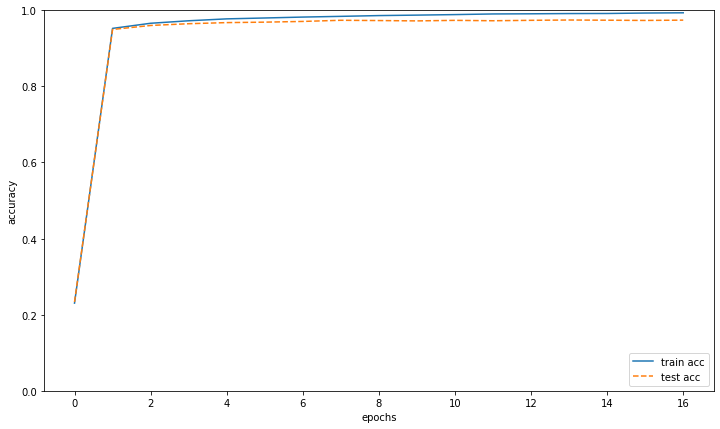

In [6]:
#### # coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

from common.optimizer import *


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
         # 가중치 초기화
        self.params = {}
        self.params['W1'] = np.random.randn(input_size, hidden_size) / np.sqrt(input_size) * np.sqrt(2)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size) * np.sqrt(2)
        self.params['b2'] = np.zeros(output_size)
        self.weight_decay_lambda = 0.001
        
        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['BatchNorm1'] = BatchNormalization(gamma=1.0, beta=0.0) 
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        weight_decay = 0
        for idx in range(1, 3):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
        
        return self.lastLayer.forward(y, t) + weight_decay


    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        
        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수

iter_per_epoch = max(train_size / batch_size, 1)

optimizer = Adam()

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    grad = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params , grad)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.figure(figsize=(12, 7))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


import pickle
with open('d:\\mnist_2_adam_He_Batch.pkl', 'wb') as f:
    pickle.dump(network.params, f)

epoch:0, train acc:0.09666666666666666, test acc:0.0954
epoch:1, train acc:0.11333333333333333, test acc:0.0992
epoch:2, train acc:0.13333333333333333, test acc:0.1067
epoch:3, train acc:0.16, test acc:0.1134
epoch:4, train acc:0.15666666666666668, test acc:0.1216
epoch:5, train acc:0.18333333333333332, test acc:0.134
epoch:6, train acc:0.19666666666666666, test acc:0.1422
epoch:7, train acc:0.22666666666666666, test acc:0.156
epoch:8, train acc:0.24333333333333335, test acc:0.1729
epoch:9, train acc:0.28, test acc:0.1919
epoch:10, train acc:0.29333333333333333, test acc:0.2036
epoch:11, train acc:0.31666666666666665, test acc:0.2146
epoch:12, train acc:0.3466666666666667, test acc:0.2364
epoch:13, train acc:0.36666666666666664, test acc:0.2518
epoch:14, train acc:0.39666666666666667, test acc:0.2687
epoch:15, train acc:0.4166666666666667, test acc:0.2806
epoch:16, train acc:0.43666666666666665, test acc:0.2868
epoch:17, train acc:0.44666666666666666, test acc:0.3017
epoch:18, train ac

epoch:159, train acc:0.88, test acc:0.7097
epoch:160, train acc:0.8933333333333333, test acc:0.7163
epoch:161, train acc:0.88, test acc:0.7094
epoch:162, train acc:0.88, test acc:0.7095
epoch:163, train acc:0.87, test acc:0.7073
epoch:164, train acc:0.8666666666666667, test acc:0.7069
epoch:165, train acc:0.8633333333333333, test acc:0.7102
epoch:166, train acc:0.8633333333333333, test acc:0.6979
epoch:167, train acc:0.8733333333333333, test acc:0.7047
epoch:168, train acc:0.8633333333333333, test acc:0.7073
epoch:169, train acc:0.8766666666666667, test acc:0.7033
epoch:170, train acc:0.8866666666666667, test acc:0.712
epoch:171, train acc:0.8733333333333333, test acc:0.7098
epoch:172, train acc:0.89, test acc:0.7156
epoch:173, train acc:0.8933333333333333, test acc:0.7235
epoch:174, train acc:0.9033333333333333, test acc:0.7255
epoch:175, train acc:0.8866666666666667, test acc:0.7178
epoch:176, train acc:0.8866666666666667, test acc:0.7154
epoch:177, train acc:0.8866666666666667, test

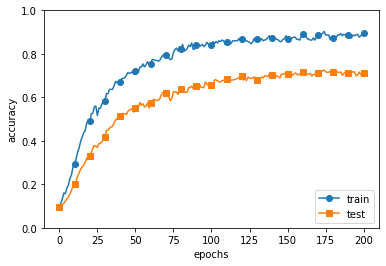

In [2]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [6]:
from common.optimizer import *
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, hidden_size)
        self.params['b3'] = np.zeros(hidden_size)        
        self.params['W4'] = weight_init_std * np.random.randn(hidden_size, hidden_size)
        self.params['b4'] = np.zeros(hidden_size)
        self.params['W5'] = weight_init_std * np.random.randn(hidden_size, hidden_size)
        self.params['b5'] = np.zeros(hidden_size)
        self.params['W6'] = weight_init_std * np.random.randn(hidden_size, hidden_size)
        self.params['b6'] = np.zeros(hidden_size)
        self.params['W7'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b7'] = np.zeros(output_size)
        self.weight_decay_lambda = 0.001
        # 계층 생성

        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['BatchNorm1'] = BatchNormalization(gamma=1.0, beta = 0.)
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['BatchNorm2'] = BatchNormalization(gamma=1.0, beta = 0.)
        self.layers['Relu2'] = Relu()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
        self.layers['BatchNorm3'] = BatchNormalization(gamma=1.0, beta = 0.)
        self.layers['Relu3'] = Relu()
        self.layers['Affine4'] = Affine(self.params['W4'], self.params['b4'])
        self.layers['BatchNorm4'] = BatchNormalization(gamma=1.0, beta = 0.)
        self.layers['Relu4'] = Relu()
        self.layers['Affine5'] = Affine(self.params['W5'], self.params['b5'])
        self.layers['BatchNorm5'] = BatchNormalization(gamma=1.0, beta = 0.)
        self.layers['Relu5'] = Relu()
        self.layers['Affine6'] = Affine(self.params['W6'], self.params['b6'])
        self.layers['BatchNorm6'] = BatchNormalization(gamma=1.0, beta = 0.)
        self.layers['Relu6'] = Relu()
        self.layers['Affine7'] = Affine(self.params['W7'], self.params['b7'])


        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        weight_decay = 0
        for idx in range(1, 3):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    # x : 입력 데이터, t : 정답 레이블

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)
        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db
        grads['W4'], grads['b4'] = self.layers['Affine4'].dW, self.layers['Affine4'].db
        grads['W5'], grads['b5'] = self.layers['Affine5'].dW, self.layers['Affine5'].db
        grads['W6'], grads['b6'] = self.layers['Affine6'].dW, self.layers['Affine6'].db
        grads['W7'], grads['b7'] = self.layers['Affine7'].dW, self.layers['Affine7'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
x_train = x_train[:300]
t_train = t_train[:300]
network = TwoLayerNet(784,100,10)
# 하이퍼파라미터

epoch=20#int(input('에폭수를 입력하세요: '))
iter_per_epoch = max(train_size / batch_size, 1)
iters_num = iter_per_epoch*epoch  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수


optimizer = Adam()

for i in range(int(iters_num)): # 10000

    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번

    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)

    grad = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params,grad)  

    # 매개변수 갱신
    #for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
    #    network.params[key] -= learning_rate * grad[key]
    # 학습 경과 기록고
    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려
        print(loss)

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

train acc, test acc | 0.44666666666666666, 0.3514
2.1541035353756053
train acc, test acc | 0.7766666666666666, 0.5621
1.9501695797979786
train acc, test acc | 0.8733333333333333, 0.6728
1.7840806692616344
train acc, test acc | 0.93, 0.7234
1.6029596821178986
train acc, test acc | 0.9466666666666667, 0.7471
1.496462552830287
train acc, test acc | 0.9633333333333334, 0.7696
1.3449457042328097
train acc, test acc | 0.98, 0.7915
1.1867302592716176
train acc, test acc | 0.99, 0.8
1.0692170686612792
train acc, test acc | 0.99, 0.7952
0.9289179376446843
train acc, test acc | 0.9966666666666667, 0.7946
0.8308174146915741
train acc, test acc | 0.9966666666666667, 0.7963
0.7029911151825247
train acc, test acc | 0.9933333333333333, 0.8013
0.6957331633372855
train acc, test acc | 0.9966666666666667, 0.8094
0.6170739905051961
train acc, test acc | 0.9966666666666667, 0.8081
0.5118610895575573
train acc, test acc | 0.9966666666666667, 0.7907
0.44771519973644897
train acc, test acc | 1.0, 0.7905
0.40

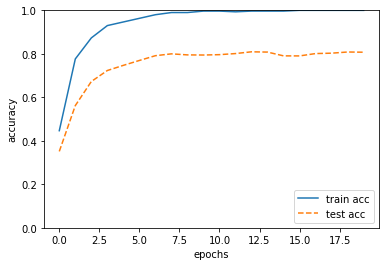

In [5]:
from common.optimizer import*
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, hidden_size)
        self.params['b3'] = np.zeros(hidden_size)        
        self.params['W4'] = weight_init_std * np.random.randn(hidden_size, hidden_size)
        self.params['b4'] = np.zeros(hidden_size)
        self.params['W5'] = weight_init_std * np.random.randn(hidden_size, hidden_size)
        self.params['b5'] = np.zeros(hidden_size)
        self.params['W6'] = weight_init_std * np.random.randn(hidden_size, hidden_size)
        self.params['b6'] = np.zeros(hidden_size)
        self.params['W7'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b7'] = np.zeros(output_size)
        self.weight_decay_lambda = 0.001
        # 계층 생성

        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['BatchNorm1'] = BatchNormalization(gamma=1.0, beta = 0.)
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['BatchNorm2'] = BatchNormalization(gamma=1.0, beta = 0.)
        self.layers['Relu2'] = Relu()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
        self.layers['BatchNorm3'] = BatchNormalization(gamma=1.0, beta = 0.)
        self.layers['Relu3'] = Relu()
        self.layers['Affine4'] = Affine(self.params['W4'], self.params['b4'])
        self.layers['BatchNorm4'] = BatchNormalization(gamma=1.0, beta = 0.)
        self.layers['Relu4'] = Relu()
        self.layers['Affine5'] = Affine(self.params['W5'], self.params['b5'])
        self.layers['BatchNorm5'] = BatchNormalization(gamma=1.0, beta = 0.)
        self.layers['Relu5'] = Relu()
        self.layers['Affine6'] = Affine(self.params['W6'], self.params['b6'])
        self.layers['BatchNorm6'] = BatchNormalization(gamma=1.0, beta = 0.)
        self.layers['Relu6'] = Relu()
        self.layers['Affine7'] = Affine(self.params['W7'], self.params['b7'])


        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        weight_decay = 0
        for idx in range(1, 3):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
        
        return self.lastLayer.forward(y, t) + weight_decay
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    # x : 입력 데이터, t : 정답 레이블

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)
        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db
        grads['W4'], grads['b4'] = self.layers['Affine4'].dW, self.layers['Affine4'].db
        grads['W5'], grads['b5'] = self.layers['Affine5'].dW, self.layers['Affine5'].db
        grads['W6'], grads['b6'] = self.layers['Affine6'].dW, self.layers['Affine6'].db
        grads['W7'], grads['b7'] = self.layers['Affine7'].dW, self.layers['Affine7'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
x_train = x_train[:300]
t_train = t_train[:300]
network = TwoLayerNet(784,100,10)
# 하이퍼파라미터

epoch=20#int(input('에폭수를 입력하세요: '))
iter_per_epoch = max(train_size / batch_size, 1)
iters_num = iter_per_epoch*epoch  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수


optimizer = Adam()

for i in range(int(iters_num)): # 10000

    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번

    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)

    grad = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params,grad)  

    # 매개변수 갱신
    #for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
    #    network.params[key] -= learning_rate * grad[key]
    # 학습 경과 기록고
    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려
        print(loss)

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train acc, test acc | 0.43333333333333335, 0.2788
2.214708026521055
train acc, test acc | 0.7733333333333333, 0.5611
2.0037593682335944
train acc, test acc | 0.8633333333333333, 0.6596
1.8622122331263566
train acc, test acc | 0.8733333333333333, 0.6857
1.7086910812628688
train acc, test acc | 0.9266666666666666, 0.7359
1.5605314820239202
train acc, test acc | 0.9466666666666667, 0.765
1.4017945153180769
train acc, test acc | 0.9666666666666667, 0.7771
1.2921812317668646
train acc, test acc | 0.97, 0.7824
1.1803261929774356
train acc, test acc | 0.9833333333333333, 0.79
1.026915009438803
train acc, test acc | 0.99, 0.797
0.9606011577655977
train acc, test acc | 0.9866666666666667, 0.8077
0.8267214031933297
train acc, test acc | 0.9933333333333333, 0.8139
0.7321724871450972
train acc, test acc | 0.9966666666666667, 0.8103
0.6615029794213105
train acc, test acc | 0.9966666666666667, 0.8061
0.590558548246254
train acc, test acc | 0.9966666666666667, 0.8062
0.5603488820063555
train acc, tes

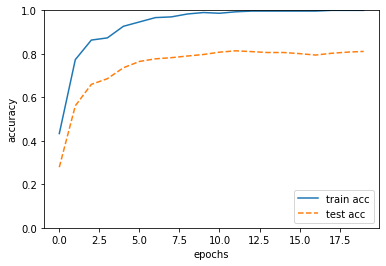

In [12]:

from common.optimizer import*
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, hidden_size)
        self.params['b3'] = np.zeros(hidden_size)        
        self.params['W4'] = weight_init_std * np.random.randn(hidden_size, hidden_size)
        self.params['b4'] = np.zeros(hidden_size)
        self.params['W5'] = weight_init_std * np.random.randn(hidden_size, hidden_size)
        self.params['b5'] = np.zeros(hidden_size)
        self.params['W6'] = weight_init_std * np.random.randn(hidden_size, hidden_size)
        self.params['b6'] = np.zeros(hidden_size)
        self.params['W7'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b7'] = np.zeros(output_size)
        self.weight_decay_lambda = 0.01
        # 계층 생성

        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['BatchNorm1'] = BatchNormalization(gamma=1.0, beta = 0.)
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['BatchNorm2'] = BatchNormalization(gamma=1.0, beta = 0.)
        self.layers['Relu2'] = Relu()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
        self.layers['BatchNorm3'] = BatchNormalization(gamma=1.0, beta = 0.)
        self.layers['Relu3'] = Relu()
        self.layers['Affine4'] = Affine(self.params['W4'], self.params['b4'])
        self.layers['BatchNorm4'] = BatchNormalization(gamma=1.0, beta = 0.)
        self.layers['Relu4'] = Relu()
        self.layers['Affine5'] = Affine(self.params['W5'], self.params['b5'])
        self.layers['BatchNorm5'] = BatchNormalization(gamma=1.0, beta = 0.)
        self.layers['Relu5'] = Relu()
        self.layers['Affine6'] = Affine(self.params['W6'], self.params['b6'])
        self.layers['BatchNorm6'] = BatchNormalization(gamma=1.0, beta = 0.)
        self.layers['Relu6'] = Relu()
        self.layers['Affine7'] = Affine(self.params['W7'], self.params['b7'])


        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):  # x : (100, 1024), t : (100, 10)

        y = self.predict(x)  # (100, 10) : 마지막 출력층을 통과한 신경망이 예측한 값
        weight_decay = 0
        for idx in range(1, 4):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W ** 2)

        return self.lastLayer.forward(y, t) + weight_decay 


    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    # x : 입력 데이터, t : 정답 레이블

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)
        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db
        grads['W4'], grads['b4'] = self.layers['Affine4'].dW, self.layers['Affine4'].db
        grads['W5'], grads['b5'] = self.layers['Affine5'].dW, self.layers['Affine5'].db
        grads['W6'], grads['b6'] = self.layers['Affine6'].dW, self.layers['Affine6'].db
        grads['W7'], grads['b7'] = self.layers['Affine7'].dW, self.layers['Affine7'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
x_train = x_train[:300]
t_train = t_train[:300]
network = TwoLayerNet(784,100,10)
# 하이퍼파라미터

epoch=20#int(input('에폭수를 입력하세요: '))
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1
iter_per_epoch = max(train_size / batch_size, 1)
iters_num = iter_per_epoch*epoch  # 반복 횟수를 적절히 설정한다.

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수


optimizer = Adam()

for i in range(int(iters_num)): # 10000

    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번

    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)

    grad = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params,grad)  

    # 매개변수 갱신
    #for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
    #    network.params[key] -= learning_rate * grad[key]
    # 학습 경과 기록고
    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려
        print(loss)

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


epoch:0, train acc:0.09666666666666666, test acc:0.0898
epoch:1, train acc:0.12333333333333334, test acc:0.1162
epoch:2, train acc:0.18, test acc:0.1526
epoch:3, train acc:0.24666666666666667, test acc:0.1793
epoch:4, train acc:0.29333333333333333, test acc:0.2102
epoch:5, train acc:0.34, test acc:0.2405
epoch:6, train acc:0.39, test acc:0.2638
epoch:7, train acc:0.43, test acc:0.2954
epoch:8, train acc:0.45, test acc:0.31
epoch:9, train acc:0.45666666666666667, test acc:0.3312
epoch:10, train acc:0.49333333333333335, test acc:0.352
epoch:11, train acc:0.5266666666666666, test acc:0.3701
epoch:12, train acc:0.5166666666666667, test acc:0.3792
epoch:13, train acc:0.53, test acc:0.383
epoch:14, train acc:0.5633333333333334, test acc:0.4073
epoch:15, train acc:0.5666666666666667, test acc:0.4175
epoch:16, train acc:0.59, test acc:0.4279
epoch:17, train acc:0.6233333333333333, test acc:0.4477
epoch:18, train acc:0.6366666666666667, test acc:0.4614
epoch:19, train acc:0.6966666666666667, te

epoch:170, train acc:1.0, test acc:0.7689
epoch:171, train acc:1.0, test acc:0.7703
epoch:172, train acc:1.0, test acc:0.7684
epoch:173, train acc:1.0, test acc:0.7683
epoch:174, train acc:1.0, test acc:0.7659
epoch:175, train acc:1.0, test acc:0.7678
epoch:176, train acc:1.0, test acc:0.7661
epoch:177, train acc:1.0, test acc:0.7659
epoch:178, train acc:1.0, test acc:0.7675
epoch:179, train acc:1.0, test acc:0.7678
epoch:180, train acc:1.0, test acc:0.7699
epoch:181, train acc:1.0, test acc:0.7691
epoch:182, train acc:1.0, test acc:0.7705
epoch:183, train acc:1.0, test acc:0.7684
epoch:184, train acc:1.0, test acc:0.7682
epoch:185, train acc:1.0, test acc:0.7683
epoch:186, train acc:1.0, test acc:0.7699
epoch:187, train acc:1.0, test acc:0.7699
epoch:188, train acc:1.0, test acc:0.7703
epoch:189, train acc:1.0, test acc:0.7692
epoch:190, train acc:1.0, test acc:0.7716
epoch:191, train acc:1.0, test acc:0.7705
epoch:192, train acc:1.0, test acc:0.7701
epoch:193, train acc:1.0, test acc

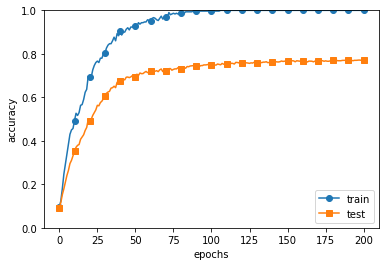

In [15]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.01
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


### <b>■ Dropout</b>

In [16]:
class Dropout:

    """    
    http://arxiv.org/abs/1207.0580
    """

    def __init__(self, dropout_ratio=0.15): # 신경망에서 15%의 뉴런을 삭제하겠다.
        self.dropout_ratio = dropout_ratio
        self.mask = None


    def forward(self, x, train_flg=True):  # 훈련할때는 드롭아웃기능을 키고 
                                           # 테스트 할 때는 드롭아웃 기능을 끈다,.
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            #100% 중에서 85%만 남겨두고 15%의 노드는 삭제하겠다.
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask
    
# self.layers = OrderedDict()
# self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
# self.layers['BatchNorm1'] = BatchNormalization(gamma=1.0, beta = 0.)
# self.layers['Relu1'] = Relu()
# self.layers['Dropout1'] = Dropout[]

# self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
# self.layers['BatchNorm2'] = BatchNormalization(gamma=1.0, beta = 0.)
# self.layers['Relu2'] = Relu()
# self.layers['Dropout2'] = Dropout[]

600.0
(60000, 784)
train acc, test acc | 0.09035, 0.0892
(60000, 784)
train acc, test acc | 0.80335, 0.8068
(60000, 784)
train acc, test acc | 0.9038333333333334, 0.9026
(60000, 784)
train acc, test acc | 0.9363833333333333, 0.9347
(60000, 784)
train acc, test acc | 0.9549666666666666, 0.9524
(60000, 784)
train acc, test acc | 0.9633666666666667, 0.96
(60000, 784)
train acc, test acc | 0.9693166666666667, 0.9645
(60000, 784)
train acc, test acc | 0.9728166666666667, 0.9657
(60000, 784)
train acc, test acc | 0.97435, 0.964
(60000, 784)
train acc, test acc | 0.9777166666666667, 0.967
(60000, 784)
train acc, test acc | 0.9809833333333333, 0.9707
(60000, 784)
train acc, test acc | 0.9814, 0.97
(60000, 784)
train acc, test acc | 0.9855666666666667, 0.9722
(60000, 784)
train acc, test acc | 0.9869833333333333, 0.9744
(60000, 784)
train acc, test acc | 0.9827333333333333, 0.9685
(60000, 784)
train acc, test acc | 0.98825, 0.9706
(60000, 784)
train acc, test acc | 0.9908666666666667, 0.9751


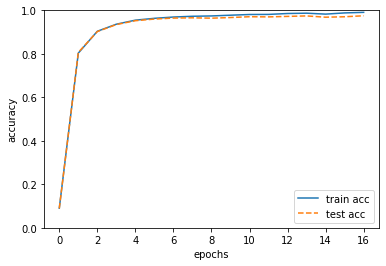

In [17]:
# ■ 드롭아웃 적용전 3층 신경망 

# 결과 : train acc, test acc | 0.98935, 0.9769

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist


class TwoLayerNet:
    def __init__(self, input_size, hidden_size,hidden_size2, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, hidden_size2)
        self.params['b2'] = np.zeros(hidden_size2)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size2, output_size)
        self.params['b3'] = np.zeros(output_size)
        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
         
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        grads['W3'] = numerical_gradient(loss_W, self.params['W3'])
        grads['b3'] = numerical_gradient(loss_W, self.params['b3'])
        
        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db
        return grads
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=100,hidden_size2=50, output_size=10)

import  pickle

with  open('d:\\two_layer_w.pkl', 'wb') as  f:
    pickle.dump( network.params,  f) 
    
# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)
print(iter_per_epoch) # 600

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)

    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2','W3','b3'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크

    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.
        print(x_train.shape) # 60000,784
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


600.0
(60000, 784)
train acc, test acc | 0.11236666666666667, 0.1135
(60000, 784)
train acc, test acc | 0.11543333333333333, 0.1178
(60000, 784)
train acc, test acc | 0.7357333333333334, 0.7405
(60000, 784)
train acc, test acc | 0.8483333333333334, 0.852
(60000, 784)
train acc, test acc | 0.8768166666666667, 0.8764
(60000, 784)
train acc, test acc | 0.9008666666666667, 0.901
(60000, 784)
train acc, test acc | 0.9137666666666666, 0.9121
(60000, 784)
train acc, test acc | 0.9222833333333333, 0.9199
(60000, 784)
train acc, test acc | 0.93005, 0.9235
(60000, 784)
train acc, test acc | 0.9324833333333333, 0.9263
(60000, 784)
train acc, test acc | 0.9356, 0.9307
(60000, 784)
train acc, test acc | 0.9404833333333333, 0.9333
(60000, 784)
train acc, test acc | 0.9433, 0.9383
(60000, 784)
train acc, test acc | 0.9448833333333333, 0.9367
(60000, 784)
train acc, test acc | 0.9469, 0.9391
(60000, 784)
train acc, test acc | 0.9460666666666666, 0.9393
(60000, 784)
train acc, test acc | 0.9491, 0.9404

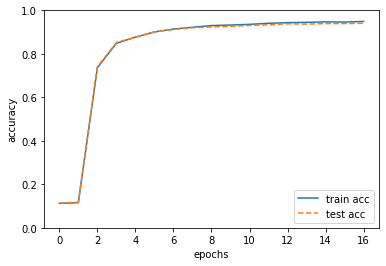

In [18]:
# ■ 드롭아웃 적용후 3층 신경망

# train acc, test acc | 0.9489666666666666, 0.9462

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist


class TwoLayerNet:
    def __init__(self, input_size, hidden_size,hidden_size2, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, hidden_size2)
        self.params['b2'] = np.zeros(hidden_size2)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size2, output_size)
        self.params['b3'] = np.zeros(output_size)
        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Dropout1'] = Dropout()
        
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
         
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        grads['W3'] = numerical_gradient(loss_W, self.params['W3'])
        grads['b3'] = numerical_gradient(loss_W, self.params['b3'])
        
        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db
        return grads
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=100,hidden_size2=50, output_size=10)

import  pickle

with  open('d:\\two_layer_w.pkl', 'wb') as  f:
    pickle.dump( network.params,  f) 
    
# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)
print(iter_per_epoch) # 600

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)

    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2','W3','b3'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크

    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.
        print(x_train.shape) # 60000,784
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


### <b>■ keras 의 EarlyStopping 기능</b>

In [ ]:
from tensorflow.keras.datasets import mnist

# 텐서플로우 저장소에서 데이터를 다운로드 받습니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data(path='mnist.npz')

from sklearn.model_selection import train_test_split

# 훈련/검증 데이터를 얻기 위해 0.7/0.3의 비율로 분리합니다.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]



# 모델의 입력으로 사용하기 위한 전처리 과정입니다.
x_train = (x_train.reshape(-1, 28, 28, 1)) / 255
x_val = (x_val.reshape(-1, 28, 28, 1)) / 255
x_test = (x_test.reshape(-1, 28, 28, 1)) / 255

from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경합니다.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import Input

# 함수형 API는 Input()을 통해 입력값의 형태를 정의해주어야 합니다.
inputs = Input(shape = (28, 28, 1))
x = Conv2D(32, (3, 3), activation = 'relu')(inputs)
x = Conv2D(32, (3, 3), activation = 'relu')(x)
x = MaxPooling2D(strides = 2)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(10, activation = 'softmax')(x)

# 위에서 정의한 층을 포함하고 있는 모델을 생성합니다.
model = Model(inputs = inputs, outputs = x)

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

from tensorflow.keras.callbacks import EarlyStopping



# 콜백을 정의합니다.

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 3, verbose = 1)]



# callbacks 인자를 통해 정의한 콜백을 전달합니다.

model.fit(x_train, y_train,
         batch_size = 32,
         validation_data = (x_val, y_val),
         epochs = 30,
         callbacks = callbacks)﻿

## <b>7장. 합성곱 신경망 (CNN)</b>

### ※ 문제93. 아래의 두 행렬을 만들고 합성곱한 결과인 15를 파이썬으로 출력하시오


In [21]:
import numpy as np
a = np.array([[1,2,3],[0,1,2],[3,0,1]])
filt = np.array([[2,0,1],[0,1,2],[1,0,2]])

np.sum(a * filt)

15

In [23]:
import numpy as np

a = np.array([[1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,2]])
a[:3,:3]

array([[1, 2, 3],
       [0, 1, 2],
       [3, 0, 1]])

### ※ 문제95. 아래의 합성곱을 파이썬으로 구현하시오

In [32]:
import numpy as np

a = np.array([[1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,2]])
filt = np.array([[2,0,1],[0,1,2],[1,0,2]])

f_map = []
for i in range(a.shape[0] - filt.shape[0] + 1):
    for k in range(a.shape[1] - filt.shape[1] + 1):
        f_map.append(np.sum(a[i:i+3, k:k+3] * filt))

f_map = np.array(f_map).reshape(2,2)
print(f_map)

[[15 16]
 [ 6 17]]


In [35]:
print('합성곱 연산')

import numpy as np

image=np.array([1,2,3,0,0,1,2,3,3,0,1,2,2,3,0,2]).reshape(4,4)
filter=np.array([2,0,1,0,1,2,1,0,2]).reshape(3,3)
feature=np.zeros([2,2])
# print(image)
h,w = image.shape
fh,fw=filter.shape
for i in range(fh-1):
    for j in range(fw-1):
        feature[i,j]=np.sum(image[i:fw+i,j:fh+j]*filter)
print(feature)

합성곱 연산
[[15. 16.]
 [ 6. 17.]]


### <b>■ 패딩 (p.232)</b>

In [37]:
import numpy as np

result = np.array([[18,19],[9,18]])
result_pad = np.pad(result, pad_width=1, mode='constant', constant_values=0)
print(result_pad)

[[ 0  0  0  0]
 [ 0 18 19  0]
 [ 0  9 18  0]
 [ 0  0  0  0]]


예제2

In [42]:
import numpy as np

a = np.array([[1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,2]])
filt = np.array([[2,0,1],[0,1,2],[1,0,2]])

a_pad = np.pad(a, pad_width=1, mode='constant', constant_values=0)

f_map = []
for i in range(a_pad.shape[0] - filt.shape[0] + 1):
    for k in range(a_pad.shape[1] - filt.shape[1] + 1):
        f_map.append(np.sum(a_pad[i:i+3, k:k+3] * filt))
i , w = a_pad.shape[0] - filt.shape[0] + 1, a_pad.shape[1] - filt.shape[1] + 1
f_map = np.array(f_map).reshape(i, w)
print(f_map.shape)
print(f_map)

(4, 4)
[[ 7 12 10  2]
 [ 4 15 16 10]
 [10  6 17  6]
 [ 8 10  6  4]]


### <b>■ 3차원 데이터의 합성곱 연산 (p.235)</b>


예제1. 레드벨벳의 아이린 사진을 3차원 행렬로 변환하시오


[[[ 79  96 104]
  [113 118 138]
  [147 137 172]
  ...
  [ 50  72  51]
  [ 50  72  51]
  [ 50  72  51]]

 [[101 118 128]
  [137 142 162]
  [169 159 194]
  ...
  [ 51  70  50]
  [ 51  70  50]
  [ 50  69  49]]

 [[116 132 147]
  [152 156 181]
  [181 171 208]
  ...
  [ 49  68  48]
  [ 49  68  48]
  [ 49  68  48]]

 ...

 [[219 199 200]
  [219 199 200]
  [222 202 203]
  ...
  [163 148 145]
  [173 157 157]
  [184 168 169]]

 [[222 202 203]
  [222 202 203]
  [224 204 205]
  ...
  [163 148 145]
  [174 158 158]
  [184 168 169]]

 [[222 202 203]
  [223 203 204]
  [225 205 206]
  ...
  [165 150 147]
  [176 160 160]
  [184 168 169]]]


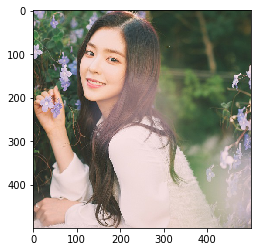

In [49]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mgimg

img = Image.open('아이린.jpg')
img_pixel = np.array(img)
plt.imshow(img_pixel)  #  (500, 500, 3)  =  (가로, 세로, 색조(RGB))
print(img_pixel)

### ※ 문제96. 아이린 사진에서 red부분의 행렬만 출하시오

[[ 79 113 147 ...  50  50  50]
 [101 137 169 ...  51  51  50]
 [116 152 181 ...  49  49  49]
 ...
 [219 219 222 ... 163 173 184]
 [222 222 224 ... 163 174 184]
 [222 223 225 ... 165 176 184]]


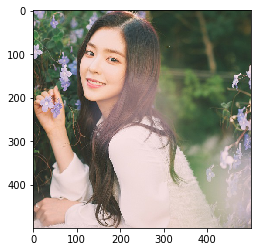

In [48]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mgimg

img = Image.open('아이린.jpg')
img_pixel = np.array(img)
plt.imshow(img_pixel)  #  (500, 500, 3)  =  (가로, 세로, 색조(RGB))
print(img_pixel[:,:,0])

### ※ 문제97. 아이린 사진을 3차원 합성곱 하기 위한 필터를 3x3 RGB 필터로 생성하시오 


In [51]:
filter = np.random.randn(1,3,3,3)
filter

array([[[[ 0.1303444 ,  0.8461124 , -0.25352338],
         [ 0.19422018, -1.30572614,  0.6217256 ],
         [ 1.34075001,  0.45697445, -1.04728774]],

        [[-0.71927296,  0.94933406,  0.11370763],
         [ 0.4987851 , -0.10388321, -1.38994959],
         [-0.85235416,  0.32921093,  0.78924226]],

        [[-1.77267929,  0.12038113, -0.01449613],
         [-1.54664071, -1.15738457, -0.99401996],
         [ 0.36866614,  1.33462072,  1.225346  ]]]])

### ※ 문제98. 위의 필터에서 red 부분 행렬만 추출하고 red 부분만 시각화 하시오

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


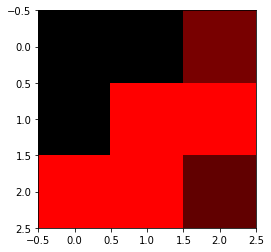

In [57]:
filter = np.random.randn(3,3,3)
filter[:,:,0]
filter[:,:,1] = 0
filter[:,:,2] = 0
plt.imshow(filter)
plt.show()

### ※ 문제99. 이번에는 blue 부분만 가져와서 출력하시오

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


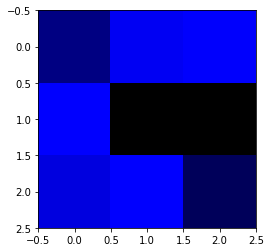

In [59]:
filter = np.random.randn(3,3,3)
filter[:,:,2]
filter[:,:,0] = 0
filter[:,:,1] = 0
plt.imshow(filter)
plt.show()

### ※ 문제100. (오늘의 마지막 문제) 아래의 행렬의 3차원 합성곱을 파이썬으로 구현하시오

In [60]:
import numpy as np

x=np.array([[[1,2,3,0],
                [0,1,2,3],  # --> red 행렬
                [3,0,1,2],
                [2,3,0,1]],

              [[2,3,4,1],
               [1,2,3,4],  # --> green 행렬
               [4,1,2,3],
              [3,4,1,2]],
            
             [[3,4,5,2],  # --> blue 행렬
              [2,3,4,5],
              [5,2,3,4],
              [4,5,2,3]]])


print (x.ndim)  # 3
print (x.shape)  # (3,4,4)  (차원,행,열)

f=np.array([[[2,0,1],
               [0,1,2],
               [1,0,2]],
            
               [[3,1,2],
                [1,2,3],
                [2,1,3]],

                [[4,2,3],
                [2,3,4],
                [3,2,4]]])

print ( f.ndim )  #  3
print ( f.shape ) #  ( 3, 3, 3 )

3
(3, 4, 4)
3
(3, 3, 3)


In [75]:
import numpy as np

x = np.array([[[1, 2, 3, 0],
               [0, 1, 2, 3],  # --> red 행렬
               [3, 0, 1, 2],
               [2, 3, 0, 1]],

              [[2, 3, 4, 1],
               [1, 2, 3, 4],  # --> green 행렬
               [4, 1, 2, 3],
               [3, 4, 1, 2]],

              [[3, 4, 5, 2],  # --> blue 행렬
               [2, 3, 4, 5],
               [5, 2, 3, 4],
               [4, 5, 2, 3]]])

f = np.array([[[2, 0, 1],
               [0, 1, 2],
               [1, 0, 2]],

              [[3, 1, 2],
               [1, 2, 3],
               [2, 1, 3]],

              [[4, 2, 3],
               [2, 3, 4],
               [3, 2, 4]]])

xc, xh, xw = x.shape
fc, fh, fw = f.shape
feature = np.zeros([xh-fh + 1, xw - fw + 1])

for i in range(xh-fh + 1):   # 0, 1
    for j in range(xw - fw + 1):  # 0, 1
        for k in range(x.shape[0]):  # 0, 1, 2
            feature[i][j] += np.sum(x[k, i:fh+i, j:fw+j] * f[k])

print(feature)

[[156. 162.]
 [126. 156.]]


In [ ]:
# %% 문제 100
def convolution(a, filter, stride=1):
    ah, aw = a.shape
    fh, fw = filter.shape

    res = []
    if (a.shape[0]-filter.shape[0]) % stride == 0:
        for i in range(0, a.shape[0]-filter.shape[0]+1, stride):
            for j in range(0, a.shape[1]-filter.shape[1]+1, stride):
                res.append(
                    np.sum(a[i:i+filter.shape[0], j:j+filter.shape[1]]*filter))

    oh = int((ah-fh)/stride)+1
    ow = int((aw-fw)/stride)+1

    return np.array(res).reshape(oh, ow)


zero = np.zeros(4).reshape(2, 2)

for i in range(x.shape[0]):
    zero += convolution(x[i], f[i])

print(zero)

In [77]:
c, h, w = x.shape
fc, fh, fw = f.shape

result = np.zeros((h - fh + 1, w - fw + 1))

for i in range(h - fh + 1):
    for j in range(w - fw + 1):
        result[i, j] = np.sum(x[:, i : i + fh, j : j + fw] * f)

print(result)

[[156. 162.]
 [126. 156.]]
